In [1]:
import numpy as np
import pylab as plt
import swyft
import torch
from tqdm import tqdm

np.random.seed(27);
torch.manual_seed(27);

In [2]:
DEVICE = 'cuda:0'

In [3]:
def model(v, sigma = .1):
    v = v * np.pi
    x = np.sin(v)**2
    return dict(x=x)

In [4]:
def noise(sim, v, sigma = 0.1):
    x = sim['x']
    x = x + np.random.randn(*x.shape) * sigma
    return dict(x=x)

In [5]:
zdim=10
v0 = np.ones(zdim)*0.25
obs0=model(v0)

In [6]:
prior = swyft.Prior(lambda u: u, zdim)

In [7]:
sim = swyft.Simulator(model, sim_shapes = dict(x=(zdim,)))
store = swyft.MemoryStore(zdim, simulator = sim)

Creating new store.


In [8]:
dataset = swyft.Dataset(10000, prior, store, simhook = noise)
dataset.simulate()

Store: Adding 9979 new samples to simulator store.


In [9]:
post = swyft.Posteriors(prior)
post.add([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], device = DEVICE)
post.train([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dataset)

Training: lr=1e-06, Epoch=30, VL=7.7754


In [10]:
post.add([(0, 1)], device = DEVICE)
post.train([(0, 1)], dataset)

Training: lr=1e-05, Epoch=16, VL=0.45232


In [11]:
samples = post.sample(100000, obs0)

(<Figure size 1080x720 with 12 Axes>,
 array([[<AxesSubplot:xlabel='0'>, <AxesSubplot:xlabel='1'>,
         <AxesSubplot:xlabel='2'>, <AxesSubplot:xlabel='3'>],
        [<AxesSubplot:xlabel='4'>, <AxesSubplot:xlabel='5'>,
         <AxesSubplot:xlabel='6'>, <AxesSubplot:xlabel='7'>],
        [<AxesSubplot:xlabel='8'>, <AxesSubplot:xlabel='9'>,
         <AxesSubplot:>, <AxesSubplot:>]], dtype=object))

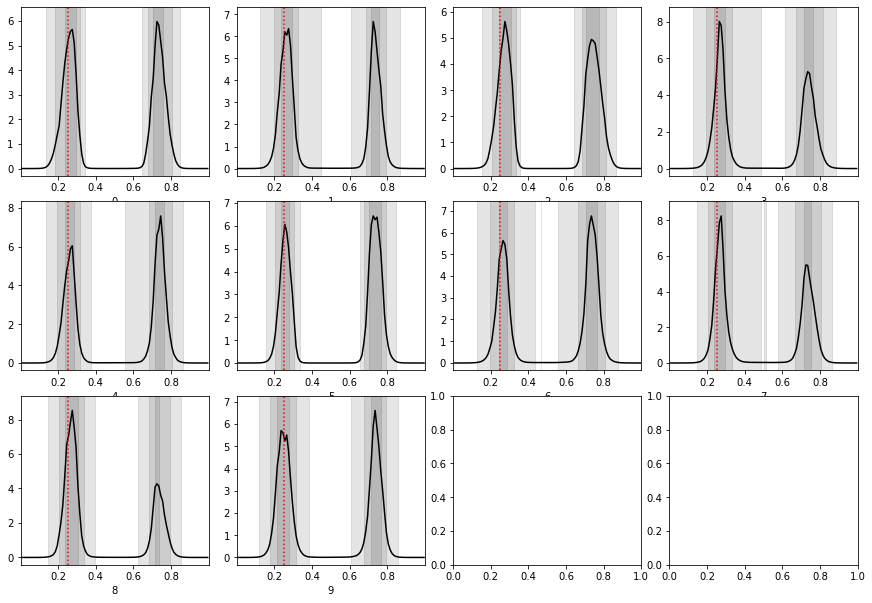

In [12]:
swyft.plot1d(samples, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], ncol = 4, truth = v0)

(<Figure size 576x576 with 4 Axes>,
 array([[<AxesSubplot:>, <AxesSubplot:>],
        [<AxesSubplot:xlabel='0', ylabel='1'>, <AxesSubplot:xlabel='1'>]],
       dtype=object))

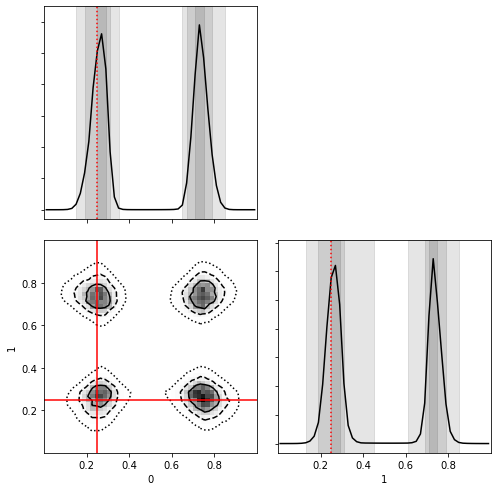

In [13]:
swyft.corner(samples, [0, 1], color='k', figsize = (8,8), truth=v0, bins=50)